**Linear and Logistic Regression**

Name - Chaitanya Inamdar

Linear Regression:

Apply linear regression on the Boston Housing dataset with "MV" as the dependent variable. Arrive at the final dataset with reduced number of columns, utilizing p-value, correlation coefficient, and multiple R-squared statistics. Use whatever libraries are appropriate when coding in Python. Can you run the same in Excel using a data analysis function and the prepared dataset?

Importing libraries for Linear Regression

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
Boston_df = pd.read_excel('/content/boston housing.xls')


In [ ]:
Boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.099998,2.4786,1,273,21.000000,391.989990,9.67,22.400000
502,0.04527,0.0,11.93,0,0.573,6.120,76.699997,2.2875,1,273,21.000000,396.899994,9.08,20.600000
503,0.06076,0.0,11.93,0,0.573,6.976,91.000000,2.1675,1,273,21.000000,396.899994,5.64,23.900000
504,0.10959,0.0,11.93,0,0.573,6.794,89.300003,2.3889,1,273,21.000000,393.450012,6.48,22.000000


Dependent Features

In [ ]:
X = Boston_df.drop(['MV'], axis=1)
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.099998,2.4786,1,273,21.000000,391.989990,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.699997,2.2875,1,273,21.000000,396.899994,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.000000,2.1675,1,273,21.000000,396.899994,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.300003,2.3889,1,273,21.000000,393.450012,6.48


Independent Feature

In [ ]:
Y = Boston_df['MV'].astype('int')
Y

0      24
1      21
2      34
3      33
4      36
       ..
501    22
502    20
503    23
504    22
505    11
Name: MV, Length: 506, dtype: int64

In [ ]:
Boston_df.shape

(506, 14)

In [ ]:
X.isna().sum(axis = 0)

CRIM     0
ZN       0
INDUS    0
CHAS     0
NOX      0
RM       0
AGE      0
DIS      0
RAD      0
TAX      0
PT       0
B        0
LSTAT    0
dtype: int64

In [ ]:
Y.isna().sum(axis = 0)

0

In [ ]:
X_Column_List = list(X.columns)

In [ ]:
X_Column_List

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PT',
 'B',
 'LSTAT']

Scaling the columns using MinMaxScaler as they are not standardized 

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X.to_numpy())
X_scaled = pd.DataFrame(X_scaled, columns=X_Column_List)
 
print("Scaled Dataset Using MinMaxScaler")
X_scaled.head()

Scaled Dataset Using MinMaxScaler


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338


Splitting data into train and Test

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.1, random_state = 100)

Defining Linear Regression Model

In [ ]:
slr = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)  
slr.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


LinearRegression(n_jobs=1, normalize=False)

In [ ]:
slr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': 1,
 'normalize': False,
 'positive': False}

In [ ]:
print("Intercept: ", slr.intercept_)
print("Coefficient: ", slr.coef_)

Intercept:  27.481055033573135
Coefficient:  [ -6.49390187   4.72106738   0.56316235   2.67167909  -8.73172324
  18.18457325   0.10483557 -16.47231928   6.68018991  -6.26409549
  -9.33012777   3.89780825 -19.99154229]


In [ ]:
#Prediction of test set
y_pred_slr= slr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_slr))

Prediction for test set: [34.4024164  30.95719431 22.07647069 17.64422734 20.3544286  26.49203199
 26.11320959 23.28251787 22.14879592 19.20513553 26.81510698 16.88398504
 20.27705327 14.99005441 41.51865684 20.16971103 28.99711256 18.64170745
 32.34787249 41.2425236  34.42071987 16.51915561 20.03028181 17.69906469
 12.72768872 11.92278079 27.20564678 19.84844353 18.52698885 19.84187452
 15.40300025 24.19512657 38.84530634 24.49724801 30.76178063 28.15223552
 16.44640732 14.53689549 16.29882762 22.88251087 22.77376765 23.05509571
 13.64664247 21.03918001 32.710149   27.06110451 19.18951922 14.61686695
 16.83938584 12.29323467 21.59084126]


Shwowing Difference between actual and predicted values by Linear Regression Model

In [ ]:
slr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_slr})
slr_diff.head()


,Actual value,Predicted value
198,34,34.402416
229,31,30.957194
502,20,22.076471
31,14,17.644227
315,16,20.354429


Calculating Additional Attributes of the model summary

In [ ]:
from sklearn import metrics
import numpy as np

meanAbErr = metrics.mean_absolute_error(y_test, y_pred_slr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_slr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_slr))
print('R squared: {:.2f}'.format(slr.score(X_scaled,Y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 73.82
Mean Absolute Error: 2.8269023867801297
Mean Square Error: 13.413229848650523
Root Mean Square Error: 3.662407657354725


Calculating Accuracy of the Linear Regression Model

In [ ]:
slr.score(x_test,y_test)

0.8318270692191928

Plotting the correlated matrix using heatMap

<ipython-input-20-af08805a0687>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(correlation, mask=np.zeros_like(correlation, dtype=np.bool), cmap=sns.diverging_palette(220,10,as_cmap=True))


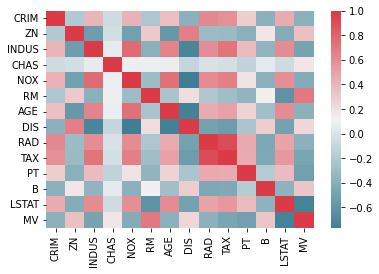

In [ ]:
import seaborn as sns
correlation = Boston_df.corr()
sns.heatmap(correlation, mask=np.zeros_like(correlation, dtype=np.bool), cmap=sns.diverging_palette(220,10,as_cmap=True))

In [ ]:
#Finding highly correlated values with the output variable
corr_target = abs(correlation['MV'])
feature_select = corr_target[corr_target>0.5]
feature_select

RM       0.695360
PT       0.507787
LSTAT    0.737663
MV       1.000000
Name: MV, dtype: float64

In [ ]:
#drop all columns except RM, PT and LSTAT
X_scaled.drop(X_scaled.columns.difference(['RM','PT','LSTAT']), 1, inplace=True)
X_scaled.head()

<ipython-input-22-7821635b451a>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_scaled.drop(X_scaled.columns.difference(['RM','PT','LSTAT']), 1, inplace=True)


,RM,PT,LSTAT
0,0.577505,0.287234,0.089680
1,0.547998,0.553191,0.204470
2,0.694386,0.553191,0.063466
3,0.658555,0.648936,0.033389
4,0.687105,0.648936,0.099338


In [ ]:
#checking if selected features are correlated to each other
X_scaled[['RM','PT']].corr()

,RM,PT
RM,1.000000,-0.355502
PT,-0.355502,1.000000


In [ ]:
X_scaled[['RM','LSTAT']].corr()

,RM,LSTAT
RM,1.000000,-0.613808
LSTAT,-0.613808,1.000000


In [ ]:
#drop RM as highly correlated to LSTAT
X_scaled.drop('RM', axis=1)

,PT,LSTAT
0,0.287234,0.089680
1,0.553191,0.204470
2,0.553191,0.063466
3,0.648936,0.033389
4,0.648936,0.099338
...,...,...
501,0.893617,0.219095
502,0.893617,0.202815
503,0.893617,0.107892
504,0.893617,0.131071


In [ ]:
model_updated = linear_model.LinearRegression().fit(X_scaled, Y)
model_updated.score(X_scaled,Y)

0.6766681567596692

In [ ]:
Y_pred = model_updated.predict(X_scaled)
Y_pred

array([30.77663719, 25.35841051, 31.75402956, 30.687979  , 29.99582096,
       26.80879854, 24.04708017, 20.92511488, 12.29492717, 21.33628201,
       21.11147576, 23.55239515, 21.61013247, 20.72834535, 20.25045841,
       20.08589033, 21.62689755, 17.24356067, 16.5254028 , 17.99076194,
       11.69983602, 17.61110417, 15.61435975, 13.45611755, 16.01038099,
       14.41435967, 16.35966596, 16.00765952, 20.60759363, 21.89000225,
       11.44431366, 18.54939474,  9.59402442, 13.82376756, 14.47772173,
       21.52478431, 20.11627459, 21.66904779, 21.41691895, 28.44157343,
       31.72967311, 29.31225964, 26.02773524, 25.28495928, 23.43178592,
       21.29652582, 19.51235931, 17.95729547,  8.21402503, 17.50283678,
       21.74504475, 24.73746648, 28.91229291, 24.77888806, 16.61248903,
       31.50447864, 27.58314227, 32.64776453, 23.6351134 , 21.29366828,
       18.19840248, 18.48130663, 25.12174809, 24.92487324, 28.33630771,
       28.91235229, 23.43844162, 22.46027986, 18.31296265, 22.09

In [ ]:
model_updated.intercept_

21.475422517851726

In [ ]:
model_updated.coef_

array([ 23.69837365,  -8.78541841, -20.75436369])

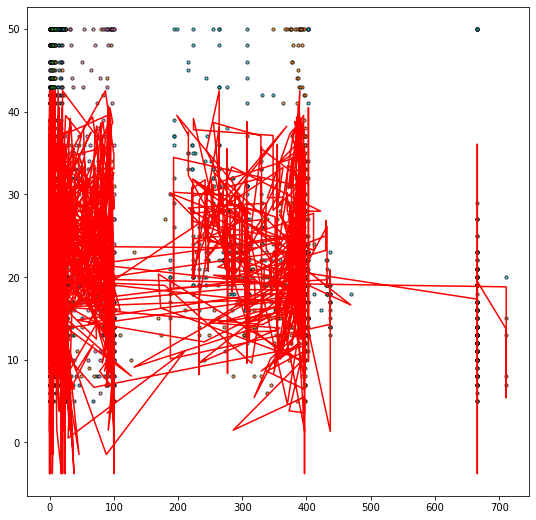

In [ ]:
fig, ax = plt.subplots(figsize = (9, 9))
for col in X.columns:
   ax.scatter(X[col], Y, s=10, alpha=0.7, edgecolors="k")
ax.plot(X, Y_pred, color='red')

Calculation of the p-value for feature importance

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
Y

0      24
1      21
2      34
3      33
4      36
       ..
501    22
502    20
503    23
504    22
505    11
Name: MV, Length: 506, dtype: int64

In [ ]:
fs = SelectKBest(chi2, k = "all" )
fit = fs.fit(Boston_df,Y)

Calculating P-values and Chi Scores to eliminated less important columns

In [ ]:
p_values = pd.DataFrame(fit.pvalues_)
scores = pd.DataFrame(fit.scores_)
independent_variable_name = pd.DataFrame(Boston_df.columns)
stats = pd.concat([independent_variable_name, p_values, scores], axis=1)
stats.columns = ["independent_variables", "p_value", "chi2_score"]
stats.sort_values(by = "p_value", inplace = True)

In [ ]:
stats

,independent_variables,p_value,chi2_score
0,CRIM,0.000000e+00,5360.115889
1,ZN,0.000000e+00,6622.534639
6,AGE,0.000000e+00,2482.496129
9,TAX,0.000000e+00,15383.874566
11,B,0.000000e+00,3411.716865
13,MV,0.000000e+00,1894.154802
8,RAD,2.391117e-286,1495.398091
12,LSTAT,4.220465e-276,1446.892898
2,INDUS,6.985554e-169,935.729174
7,DIS,4.108199e-18,174.705607


In [ ]:
p_values

,0
0,0.000000e+00
1,0.000000e+00
2,6.985554e-169
3,1.179492e-01
4,1.000000e+00
5,9.961516e-01
6,0.000000e+00
7,4.108199e-18
8,2.391117e-286
9,0.000000e+00


In [ ]:
scores

,0
0,5360.115889
1,6622.534639
2,935.729174
3,53.053015
4,5.259642
5,21.614533
6,2482.496129
7,174.705607
8,1495.398091
9,15383.874566


Defining Threshold values of chi value and P Value

In [ ]:
pthres = 2
sthres = 10

Selecting Columns based on the given p value and Chi value threshold

In [ ]:
selected_variables = stats.loc[(stats["chi2_score"] >= sthres) & (stats["p_value"] <= pthres)]
selected_variables = selected_variables["independent_variables"].tolist()
X_new = Boston_df[selected_variables]
X_new

,CRIM,ZN,AGE,TAX,B,MV,RAD,LSTAT,INDUS,DIS,CHAS,PT,RM
0,0.00632,18.0,65.199997,296,396.899994,24.000000,1,4.98,2.31,4.0900,0,15.300000,6.575
1,0.02731,0.0,78.900002,242,396.899994,21.600000,2,9.14,7.07,4.9671,0,17.799999,6.421
2,0.02729,0.0,61.099998,242,392.829987,34.700001,2,4.03,7.07,4.9671,0,17.799999,7.185
3,0.03237,0.0,45.799999,222,394.630005,33.400002,3,2.94,2.18,6.0622,0,18.700001,6.998
4,0.06905,0.0,54.200001,222,396.899994,36.200001,3,5.33,2.18,6.0622,0,18.700001,7.147
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,69.099998,273,391.989990,22.400000,1,9.67,11.93,2.4786,0,21.000000,6.593
502,0.04527,0.0,76.699997,273,396.899994,20.600000,1,9.08,11.93,2.2875,0,21.000000,6.120
503,0.06076,0.0,91.000000,273,396.899994,23.900000,1,5.64,11.93,2.1675,0,21.000000,6.976
504,0.10959,0.0,89.300003,273,393.450012,22.000000,1,6.48,11.93,2.3889,0,21.000000,6.794


In [ ]:
X_new = X_new.drop(['MV'], axis=1)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_new, Y, test_size = 0.1, random_state = 100)

In [ ]:
model_PValue = linear_model.LinearRegression().fit(x_train, y_train)


Newly calculated Accuracy after selecting important features

In [ ]:
model_PValue.score(x_test,y_test)

0.8160927600251656

In [ ]:
Y_pred_pvalue = model_PValue.predict(x_test)
Y_pred_pvalue

array([33.49956758, 31.24595988, 22.96998289, 18.04062776, 20.43644623,
       25.29361258, 25.65422614, 23.04108498, 21.71220521, 19.92909737,
       26.19882551, 17.22515102, 21.02363254, 15.04685921, 40.97544738,
       21.09022113, 28.48741494, 18.85805956, 31.37835998, 40.3644211 ,
       35.50985863, 17.4054193 , 19.38106069, 18.37874483, 13.95895696,
       12.42994845, 28.03314999, 18.89483314, 17.70045098, 19.70307654,
       15.68032742, 23.5745326 , 38.3871671 , 24.85773565, 31.69921162,
       28.93760048, 14.94771559, 14.8695057 , 14.6571272 , 23.28953588,
       22.57572495, 24.19597234, 13.25943773, 20.8463271 , 31.29183909,
       25.5537999 , 18.20275731, 17.75952033, 15.7905429 , 13.02672813,
       21.68881348])

In [ ]:
model_PValue_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': Y_pred_pvalue})
model_PValue_diff.head()


,Actual value,Predicted value
198,34,33.499568
229,31,31.245960
502,20,22.969983
31,14,18.040628
315,16,20.436446


Updated model attributes after selecting important features

In [ ]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_slr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_slr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_slr))
print('R squared: {:.2f}'.format(model_PValue.score(X_new,Y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 72.61
Mean Absolute Error: 2.8269023867801297
Mean Square Error: 13.413229848650523
Root Mean Square Error: 3.662407657354725


Logistic Regression:

Apply logistic regression on the Loan dataset with "Decision" as the dependent variable. Do the necessary one-hot encoding for the categorical variables and discard the irrelevant variables. Use whatever libraries are appropriate when coding in Python.

Importing Loan dataset

In [ ]:
loan_df = pd.read_excel("/content/loan.xlsx")

In [ ]:
loan_df.head()

,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance,Decision
0,M,50.750000,0.585,owner,given,unemploye,unemploye,0,0,f,given,145,0,reject
1,M,19.670000,10.000,rent,not_given,labourer,governmen,0,0,t,given,140,0,reject
2,F,52.830002,15.000,owner,given,creative_,private_s,5,14,f,given,0,2200,accept
3,M,22.670000,2.540,rent,not_given,creative_,governmen,2,0,f,given,0,0,accept
4,M,29.250000,13.000,owner,given,driver,governmen,0,0,f,given,228,0,reject


Getting numerical columns

In [ ]:
numeric_cols = loan_df._get_numeric_data().columns

In [ ]:
numeric_cols

Index(['Age', 'Time_at_address', 'Time_employed', 'Time_bank', 'Home_Expn',
       'Balance'],
      dtype='object')

Plotting distribution of numerical columns

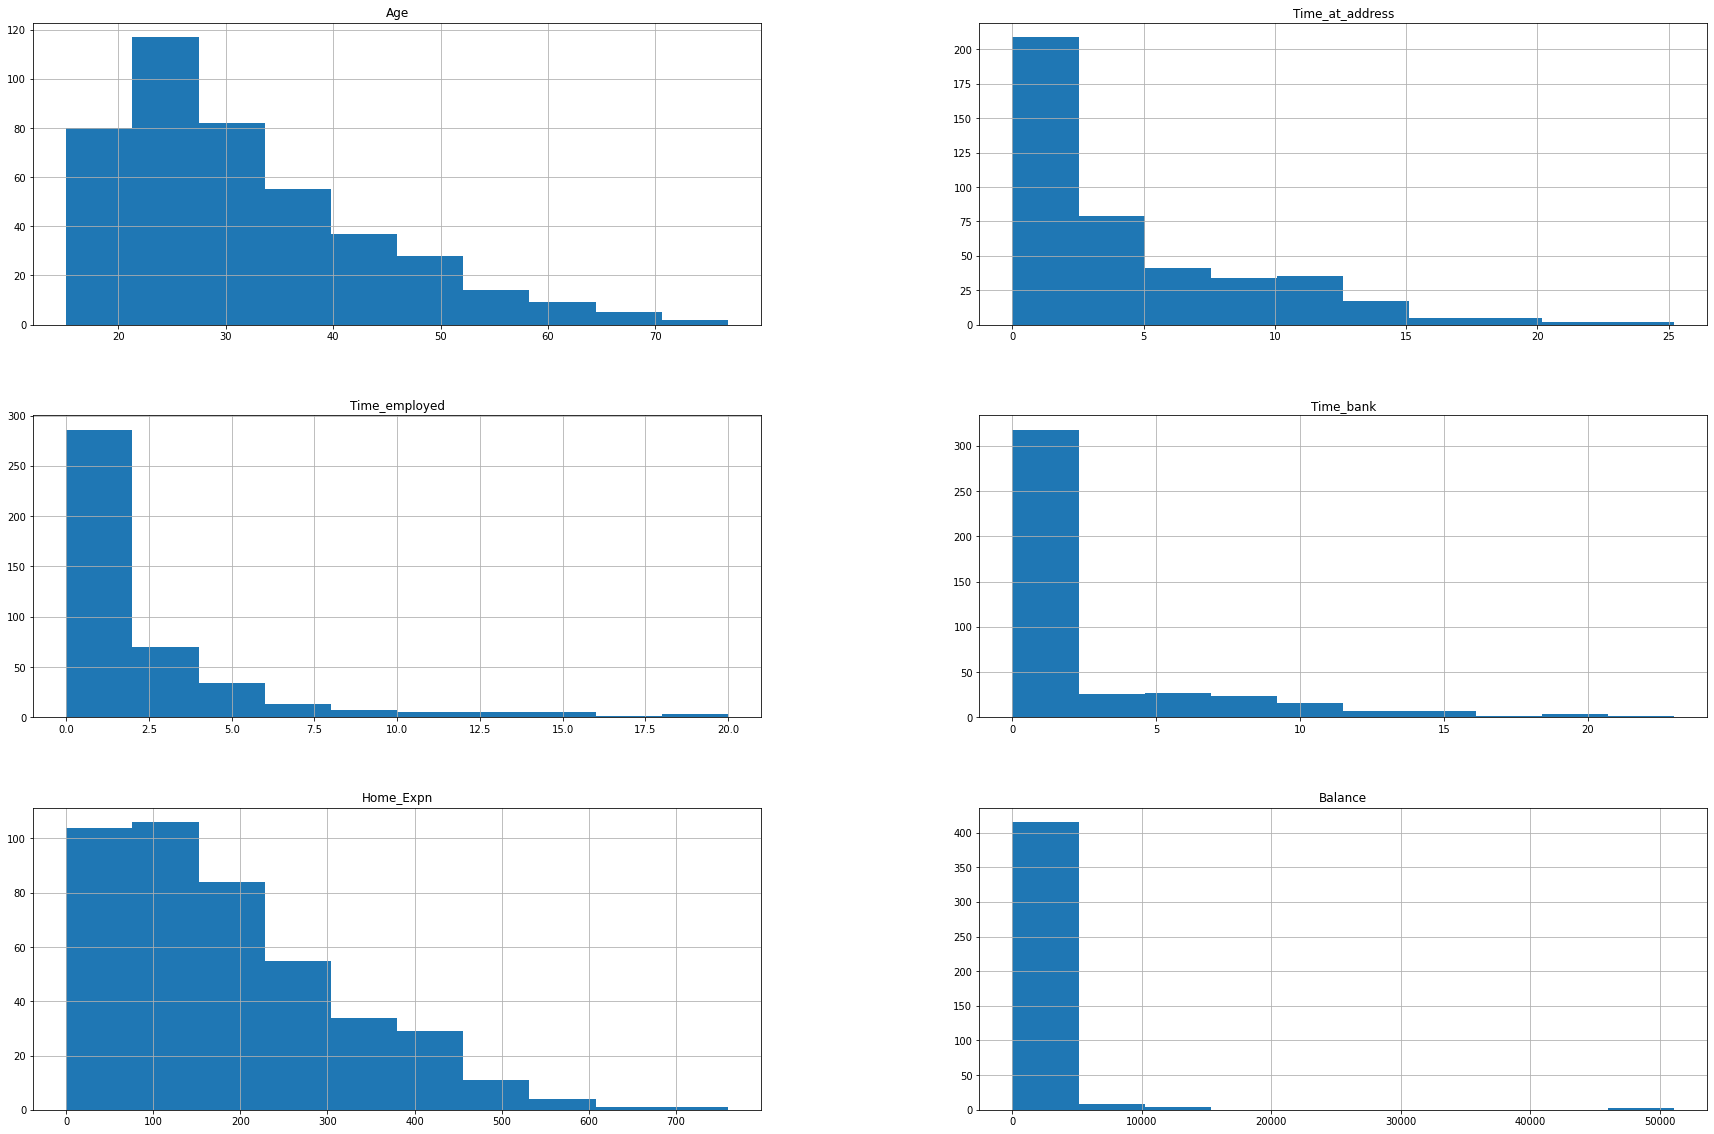

In [ ]:
loan_df[numeric_cols].hist(figsize=(30,20));


In [ ]:
Numeric_loan_df = loan_df[numeric_cols]


In [ ]:
Numeric_loan_df

,Age,Time_at_address,Time_employed,Time_bank,Home_Expn,Balance
0,50.750000,0.585,0,0,145,0
1,19.670000,10.000,0,0,140,0
2,52.830002,15.000,5,14,0,2200
3,22.670000,2.540,2,0,0,0
4,29.250000,13.000,0,0,228,0
...,...,...,...,...,...,...
424,34.169998,2.750,2,0,232,200
425,22.250000,1.250,3,0,280,0
426,23.330000,1.500,1,0,422,200
427,21.000000,4.790,2,1,80,300


Getting catagorical columns

In [ ]:
catagorical_df =  loan_df.drop(['Age', 'Time_at_address', 'Time_employed', 'Time_bank', 'Home_Expn',
       'Balance'], axis=1)


In [ ]:
catagorical_df

,Sex,Res_status,Telephone,Occupation,Job_status,Liab_ref,Acc_ref,Decision
0,M,owner,given,unemploye,unemploye,f,given,reject
1,M,rent,not_given,labourer,governmen,t,given,reject
2,F,owner,given,creative_,private_s,f,given,accept
3,M,rent,not_given,creative_,governmen,f,given,accept
4,M,owner,given,driver,governmen,f,given,reject
...,...,...,...,...,...,...,...,...
424,M,owner,given,guard_etc,self_empl,t,given,reject
425,F,rent,not_given,unemploye,unemploye,f,given,reject
426,M,owner,given,creative_,governmen,f,given,accept
427,M,rent,not_given,productio,private_s,t,given,accept


Standardizing the numerical columns by using MinMaxScaler

In [ ]:
mm_scaler = MinMaxScaler()
Scaled_numeric_Df = pd.DataFrame(mm_scaler.fit_transform(Numeric_loan_df),columns = numeric_cols)



In [ ]:
Scaled_numeric_Df

,Age,Time_at_address,Time_employed,Time_bank,Home_Expn,Balance
0,0.577785,0.023205,0.00,0.000000,0.190789,0.000000
1,0.073076,0.396668,0.00,0.000000,0.184211,0.000000
2,0.611562,0.595002,0.25,0.608696,0.000000,0.043053
3,0.121793,0.100754,0.10,0.000000,0.000000,0.000000
4,0.228646,0.515668,0.00,0.000000,0.300000,0.000000
...,...,...,...,...,...,...
424,0.308542,0.109084,0.10,0.000000,0.305263,0.003914
425,0.114972,0.049584,0.15,0.000000,0.368421,0.000000
426,0.132511,0.059500,0.05,0.000000,0.555263,0.003914
427,0.094674,0.190004,0.10,0.043478,0.105263,0.005871


In [ ]:
Scaled_final_loan_df = pd.concat([Scaled_numeric_Df, catagorical_df], axis=1)
Scaled_final_loan_df

,Age,Time_at_address,Time_employed,Time_bank,Home_Expn,Balance,Sex,Res_status,Telephone,Occupation,Job_status,Liab_ref,Acc_ref,Decision
0,0.577785,0.023205,0.00,0.000000,0.190789,0.000000,M,owner,given,unemploye,unemploye,f,given,reject
1,0.073076,0.396668,0.00,0.000000,0.184211,0.000000,M,rent,not_given,labourer,governmen,t,given,reject
2,0.611562,0.595002,0.25,0.608696,0.000000,0.043053,F,owner,given,creative_,private_s,f,given,accept
3,0.121793,0.100754,0.10,0.000000,0.000000,0.000000,M,rent,not_given,creative_,governmen,f,given,accept
4,0.228646,0.515668,0.00,0.000000,0.300000,0.000000,M,owner,given,driver,governmen,f,given,reject
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,0.308542,0.109084,0.10,0.000000,0.305263,0.003914,M,owner,given,guard_etc,self_empl,t,given,reject
425,0.114972,0.049584,0.15,0.000000,0.368421,0.000000,F,rent,not_given,unemploye,unemploye,f,given,reject
426,0.132511,0.059500,0.05,0.000000,0.555263,0.003914,M,owner,given,creative_,governmen,f,given,accept
427,0.094674,0.190004,0.10,0.043478,0.105263,0.005871,M,rent,not_given,productio,private_s,t,given,accept


In [ ]:
print(loan_df['Sex'].unique())
print(loan_df['Res_status'].unique())
print(loan_df['Telephone'].unique())
print(loan_df['Occupation'].unique())
print(loan_df['Job_status'].unique())
print(loan_df['Liab_ref'].unique())
print(loan_df['Acc_ref'].unique())
print(loan_df['Decision'].unique())

['M' 'F']
['owner' 'rent']
['given' 'not_given']
['unemploye' 'labourer' 'creative_' 'driver' 'professio' 'manager'
 'guard_etc' 'executive' 'office_st' 'productio' 'semi_pro' 'sales']
['unemploye' 'governmen' 'private_s' 'self_empl' 'retired' 'student'
 'military']
['f' 't']
['given' 'oth_inst_']
['reject' 'accept']


generating dummy variables for catagorical column using one hot encoding

In [ ]:
one_hot_encoded_data = pd.get_dummies(Scaled_final_loan_df, columns = ['Sex', 'Res_status','Telephone','Occupation','Job_status','Liab_ref','Acc_ref'],drop_first=True)


In [ ]:
one_hot_encoded_data

,Age,Time_at_address,Time_employed,Time_bank,Home_Expn,Balance,Decision,Sex_M,Res_status_rent,Telephone_not_given,...,Occupation_semi_pro,Occupation_unemploye,Job_status_military,Job_status_private_s,Job_status_retired,Job_status_self_empl,Job_status_student,Job_status_unemploye,Liab_ref_t,Acc_ref_oth_inst_
0,0.577785,0.023205,0.00,0.000000,0.190789,0.000000,reject,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0.073076,0.396668,0.00,0.000000,0.184211,0.000000,reject,1,1,1,...,0,0,0,0,0,0,0,0,1,0
2,0.611562,0.595002,0.25,0.608696,0.000000,0.043053,accept,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0.121793,0.100754,0.10,0.000000,0.000000,0.000000,accept,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0.228646,0.515668,0.00,0.000000,0.300000,0.000000,reject,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,0.308542,0.109084,0.10,0.000000,0.305263,0.003914,reject,1,0,0,...,0,0,0,0,0,1,0,0,1,0
425,0.114972,0.049584,0.15,0.000000,0.368421,0.000000,reject,0,1,1,...,0,1,0,0,0,0,0,1,0,0
426,0.132511,0.059500,0.05,0.000000,0.555263,0.003914,accept,1,0,0,...,0,0,0,0,0,0,0,0,0,0
427,0.094674,0.190004,0.10,0.043478,0.105263,0.005871,accept,1,1,1,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
lable_encoder = preprocessing.LabelEncoder()
one_hot_encoded_data['Decision'] = lable_encoder.fit_transform(one_hot_encoded_data['Decision'])
one_hot_encoded_data['Decision'].unique

<bound method Series.unique of 0      1
1      1
2      0
3      0
4      1
      ..
424    1
425    1
426    0
427    0
428    1
Name: Decision, Length: 429, dtype: int64>

In [ ]:
one_hot_encoded_data.head()

,Age,Time_at_address,Time_employed,Time_bank,Home_Expn,Balance,Decision,Sex_M,Res_status_rent,Telephone_not_given,...,Occupation_semi_pro,Occupation_unemploye,Job_status_military,Job_status_private_s,Job_status_retired,Job_status_self_empl,Job_status_student,Job_status_unemploye,Liab_ref_t,Acc_ref_oth_inst_
0,0.577785,0.023205,0.00,0.000000,0.190789,0.000000,1,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0.073076,0.396668,0.00,0.000000,0.184211,0.000000,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
2,0.611562,0.595002,0.25,0.608696,0.000000,0.043053,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0.121793,0.100754,0.10,0.000000,0.000000,0.000000,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0.228646,0.515668,0.00,0.000000,0.300000,0.000000,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Dependent Features

In [ ]:
X_LR = one_hot_encoded_data.drop(['Decision'],axis=1)
X_LR

,Age,Time_at_address,Time_employed,Time_bank,Home_Expn,Balance,Sex_M,Res_status_rent,Telephone_not_given,Occupation_driver,...,Occupation_semi_pro,Occupation_unemploye,Job_status_military,Job_status_private_s,Job_status_retired,Job_status_self_empl,Job_status_student,Job_status_unemploye,Liab_ref_t,Acc_ref_oth_inst_
0,0.577785,0.023205,0.00,0.000000,0.190789,0.000000,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0.073076,0.396668,0.00,0.000000,0.184211,0.000000,1,1,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0.611562,0.595002,0.25,0.608696,0.000000,0.043053,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0.121793,0.100754,0.10,0.000000,0.000000,0.000000,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0.228646,0.515668,0.00,0.000000,0.300000,0.000000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,0.308542,0.109084,0.10,0.000000,0.305263,0.003914,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
425,0.114972,0.049584,0.15,0.000000,0.368421,0.000000,0,1,1,0,...,0,1,0,0,0,0,0,1,0,0
426,0.132511,0.059500,0.05,0.000000,0.555263,0.003914,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
427,0.094674,0.190004,0.10,0.043478,0.105263,0.005871,1,1,1,0,...,0,0,0,1,0,0,0,0,1,0


Independent Targer

In [ ]:
Y_LR = one_hot_encoded_data['Decision']
Y_LR

0      1
1      1
2      0
3      0
4      1
      ..
424    1
425    1
426    0
427    0
428    1
Name: Decision, Length: 429, dtype: int64

In [ ]:
one_hot_encoded_data.shape

(429, 29)

In [ ]:
cols = loan_df.columns
num_cols = loan_df._get_numeric_data().columns

Splitting Data into train and Test

In [ ]:
x_train_LR, x_test_LR, y_train_LR, y_test_LR = train_test_split(X_LR, Y_LR, test_size = 0.1, random_state = 100)

In [ ]:
x_train_LR

,Age,Time_at_address,Time_employed,Time_bank,Home_Expn,Balance,Sex_M,Res_status_rent,Telephone_not_given,Occupation_driver,...,Occupation_semi_pro,Occupation_unemploye,Job_status_military,Job_status_private_s,Job_status_retired,Job_status_self_empl,Job_status_student,Job_status_unemploye,Liab_ref_t,Acc_ref_oth_inst_
219,0.170510,0.087664,0.2,0.000000,0.247368,0.000000,1,1,1,0,...,0,0,0,1,0,0,0,0,0,0
305,0.131211,0.039667,0.0,0.000000,0.394737,0.000000,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
424,0.308542,0.109084,0.1,0.000000,0.305263,0.003914,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
78,0.205586,0.059500,0.1,0.478261,0.571053,0.000685,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
396,0.261124,0.044625,0.0,0.043478,0.126316,0.000372,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,0.142092,0.026378,0.0,0.000000,0.131579,0.000000,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
359,0.090614,0.201706,0.0,0.000000,0.184211,0.003601,1,1,1,0,...,0,0,0,1,0,0,0,0,0,0
323,0.133972,0.023205,0.0,0.000000,0.236842,0.000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
280,0.301721,0.109084,0.0,0.000000,0.236842,0.000000,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


Checking if Target variable is balanced in both test and train data or not

In [ ]:
print(y_test_LR.value_counts())
print(y_train_LR.value_counts())

1    23
0    20
Name: Decision, dtype: int64
1    214
0    172
Name: Decision, dtype: int64


Defining Logistic Regression

In [ ]:
logistic_regression = LogisticRegression(solver='liblinear').fit(x_train_LR, y_train_LR)


Calculating Predicted values on test dataset

In [ ]:
#Prediction of test set
y_pred_LR= logistic_regression.predict(x_test_LR)
#Predicted values
print("Prediction for test set: {}".format(y_pred_LR))

Prediction for test set: [1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1
 1 1 1 1 1 1]


Showing difference between actual value and predicted value

In [ ]:
LR_diff = pd.DataFrame({'Actual value': y_test_LR, 'Predicted value': y_pred_LR})
LR_diff.head()


,Actual value,Predicted value
191,1,1
205,1,1
378,1,1
23,1,1
140,0,0


Calculating accuracy of the Logistic regression model on test data

In [ ]:
logistic_regression.score(x_test_LR,y_test_LR)

0.7441860465116279

Creating confusion matrix for better understanding of precision and recall

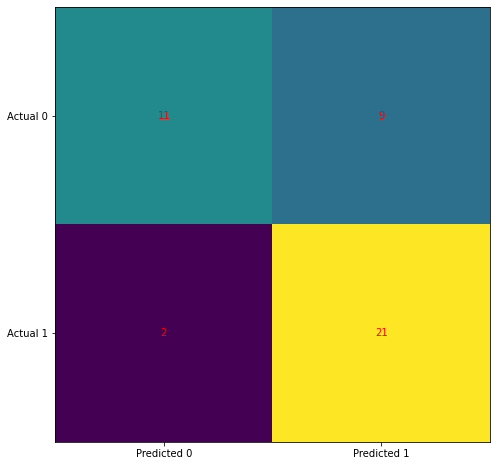

In [ ]:
confusionMatrix = confusion_matrix(y_test_LR, logistic_regression.predict(x_test_LR))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(confusionMatrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0', 'Predicted 1'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0', 'Actual 1'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confusionMatrix[i, j], ha='center', va='center', color='red')
plt.show()

Importing libraries for hyperparameter tuning

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

Defining Grid search

In [ ]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train_LR, y_train_LR)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.779577 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.779577 (0.048699) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.779577 (0.048699) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.779577 (0.048699) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.770985 (0.053493) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.770985 (0.053493) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.770130 (0.054125) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.744220 (0.055924) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.744220 (0.055924) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.746806 (0.058259) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.724314 (0.051400) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.724314 (0.051400) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.723414 (0.049301) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.558614 (0.020976) wit

In [ ]:
logistic_regression.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

Passing the best parameters calculated via grid search

In [ ]:
logistic_regression_tuned = LogisticRegression(C=0.545559, penalty='l2', solver='liblinear').fit(x_train_LR, y_train_LR)


In [ ]:
logistic_regression_tuned.get_params()

{'C': 0.545559,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#Prediction of test set
y_pred_LR_tuned= logistic_regression.predict(x_test_LR)
#Predicted values
print("Prediction for test set: {}".format(y_pred_LR_tuned))

Prediction for test set: [1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1
 1 1 1 1 1 1]


Showing difference between predicted and actual value after hyper parameter tuning using grid search

In [ ]:
LR_diff_tuned = pd.DataFrame({'Actual value': y_test_LR, 'Predicted value': y_pred_LR})
LR_diff_tuned.head()


,Actual value,Predicted value
191,1,1
205,1,1
378,1,1
23,1,1
140,0,0


Newly generated accuracy using hyperparameter tuning

In [ ]:
logistic_regression_tuned.score(x_test_LR,y_test_LR)

0.7441860465116279

In [ ]:
# Confusion Matrix function
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

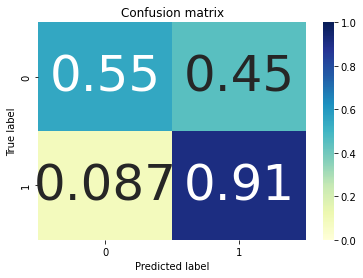

In [ ]:
# Visualizing cm
cm = confusion_matrix(y_test_LR, y_pred_LR)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = logistic_regression.classes_, title='Confusion matrix')

In [ ]:
cm.sum(axis=1)
cm_norm

array([[0.55      , 0.45      ],
       [0.08695652, 0.91304348]])

In [ ]:
cm.sum(axis=0)

array([13, 30])

In [ ]:
np.diag(cm)


array([11, 21])

In [ ]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP / (TP + FN)
print("The True Positive Rate is:", TPR)

# Precision or positive predictive value
PPV = TP / (TP + FP)
print("The Precision is:", PPV)

# False positive rate or False alarm rate
FPR = FP / (FP + TN)
print("The False positive rate is:", FPR)


# False negative rate or Miss Rate
FNR = FN / (FN + TP)
print("The False Negative Rate is: ", FNR)



##Total averages :
print("")
print("The average TPR is:", TPR.sum()/2)
print("The average Precision is:", PPV.sum()/2)
print("The average False positive rate is:", FPR.sum()/2)
print("The average False Negative Rate is:", FNR.sum()/2)

The True Positive Rate is: [0.55       0.91304348]
The Precision is: [0.84615385 0.7       ]
The False positive rate is: [0.08695652 0.45      ]
The False Negative Rate is:  [0.45       0.08695652]

The average TPR is: 0.7315217391304347
The average Precision is: 0.773076923076923
The average False positive rate is: 0.2684782608695652
The average False Negative Rate is: 0.2684782608695652


In [ ]:
from sklearn.metrics import roc_curve

pred_prob1 = logistic_regression.predict_proba(x_test_LR)

fpr1, tpr1, thresh1 = roc_curve(y_test_LR, pred_prob1[:,1], pos_label=1)


In [ ]:
random_probs = [0 for i in range(len(y_test_LR))]
p_fpr, p_tpr, _ = roc_curve(y_test_LR, random_probs, pos_label=1)

Calculating area under the curve feature which is more important than accuracy

In [ ]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test_LR, pred_prob1[:,1])

print(auc_score1)

0.7804347826086957


Plotting ROC and AUC curve for the logistic regression model

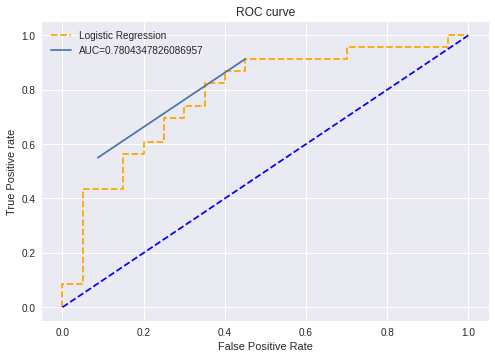

In [ ]:
import matplotlib.pyplot as plt

y_pred_proba = logistic_regression.predict_proba(x_test_LR)[::,1]

auc = metrics.roc_auc_score(y_test_LR, y_pred_proba)
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.plot(FPR,TPR,label="AUC="+str(auc))

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
# Accuracy on Train
print("The Training Accuracy is: ", logistic_regression.score(x_train_LR, y_train_LR))

# Accuracy on Test
print("The Testing Accuracy is: ", logistic_regression.score(x_test_LR, y_test_LR))


# Classification Report
print(classification_report(y_test_LR, y_pred_LR))

The Training Accuracy is:  0.7875647668393783
The Testing Accuracy is:  0.7441860465116279
              precision    recall  f1-score   support

           0       0.85      0.55      0.67        20
           1       0.70      0.91      0.79        23

    accuracy                           0.74        43
   macro avg       0.77      0.73      0.73        43
weighted avg       0.77      0.74      0.73        43



In [ ]:

# predict - Predict class labels for samples in X
logistic_regression.predict(x_train_LR)
y_pred = logistic_regression.predict(x_train_LR)

# predict_proba - Probability estimates
pred_proba = logistic_regression.predict_proba(x_train_LR)

# coef_ - Coefficient of the features in the decision function
logistic_regression.coef_

# score- Returns the mean accuracy on the given test data and labels - below

array([[-0.90753071, -0.46214124, -1.90343815, -4.05691578,  0.82364307,
        -1.15166577,  0.03501188,  0.30156978,  0.30156978,  0.53952866,
        -0.29547765,  1.10505453,  0.44446574,  0.23919677, -0.32985315,
        -0.23411473, -1.23866476,  0.07514949, -1.11310132,  0.97407929,
         0.36421988,  0.26847222, -0.08539267, -0.19832036,  0.16179366,
         0.97407929, -0.1106179 ,  0.04005712]])

In [ ]:
from sklearn.metrics import log_loss

# Running Log loss on training
print("The Log Loss on Training is: ", log_loss(y_train_LR, pred_proba))

# Running Log loss on testing
pred_proba_t = logistic_regression.predict_proba(x_test_LR)
print("The Log Loss on Testing Dataset is: ", log_loss(y_test_LR, pred_proba_t))

The Log Loss on Training is:  0.4711311329737414
The Log Loss on Testing Dataset is:  0.6044287403319704


In [ ]:
np.geomspace(1e-5, 1e5, num=20)


array([1.00000000e-05, 3.35981829e-05, 1.12883789e-04, 3.79269019e-04,
       1.27427499e-03, 4.28133240e-03, 1.43844989e-02, 4.83293024e-02,
       1.62377674e-01, 5.45559478e-01, 1.83298071e+00, 6.15848211e+00,
       2.06913808e+01, 6.95192796e+01, 2.33572147e+02, 7.84759970e+02,
       2.63665090e+03, 8.85866790e+03, 2.97635144e+04, 1.00000000e+05])

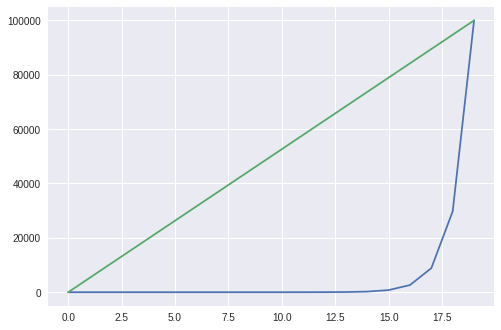

In [ ]:
# Creating a range for C values
np.geomspace(1e-5, 1e5, num=20)

# ploting it
plt.plot(np.geomspace(1e-5, 1e5, num=20)) #  uniformly distributed in log space
plt.plot(np.linspace(1e-5, 1e5, num=20)) # uniformly distributed in linear space, instead of log space
# plt.plot(np.logspace(np.log10(1e-5) , np.log10(1e5) , num=20)) # same as geomspace

In [ ]:
# Looping over the parameters

C_List = np.geomspace(1e-5, 1e5, num=20)
CA = []
Logarithmic_Loss = []

for c in C_List:
    log_reg2 = LogisticRegression(random_state=10, solver = 'lbfgs', C=c)
    log_reg2.fit(x_train_LR, y_train_LR)
    score = log_reg2.score(x_test_LR, y_test_LR)
    CA.append(score)
    print("The CA of C parameter {} is {}:".format(c, score))
    pred_proba_t = log_reg2.predict_proba(x_test_LR)
    log_loss2 = log_loss(y_test_LR, pred_proba_t)
    Logarithmic_Loss.append(log_loss2)
    print("The Logg Loss of C parameter {} is {}:".format(c, log_loss2))
    print("")

The CA of C parameter 1e-05 is 0.5348837209302325:
The Logg Loss of C parameter 1e-05 is 0.6914600830436719:

The CA of C parameter 3.359818286283781e-05 is 0.5348837209302325:
The Logg Loss of C parameter 3.359818286283781e-05 is 0.6914115261769754:

The CA of C parameter 0.00011288378916846884 is 0.5348837209302325:
The Logg Loss of C parameter 0.00011288378916846884 is 0.6912487448462646:

The CA of C parameter 0.000379269019073225 is 0.5348837209302325:
The Logg Loss of C parameter 0.000379269019073225 is 0.6907058616722377:

The CA of C parameter 0.0012742749857031334 is 0.5348837209302325:
The Logg Loss of C parameter 0.0012742749857031334 is 0.6889254595405333:

The CA of C parameter 0.004281332398719391 is 0.5348837209302325:
The Logg Loss of C parameter 0.004281332398719391 is 0.6833749343020235:

The CA of C parameter 0.01438449888287663 is 0.5581395348837209:
The Logg Loss of C parameter 0.01438449888287663 is 0.6681705339824516:

The CA of C parameter 0.04832930238571752 is

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

The CA of C parameter 69.51927961775606 is 0.7441860465116279:
The Logg Loss of C parameter 69.51927961775606 is 0.6984782832513169:

The CA of C parameter 233.57214690901213 is 0.7209302325581395:
The Logg Loss of C parameter 233.57214690901213 is 0.7034100710721579:



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The CA of C parameter 784.7599703514607 is 0.7209302325581395:
The Logg Loss of C parameter 784.7599703514607 is 0.7075942792523912:

The CA of C parameter 2636.6508987303555 is 0.7209302325581395:
The Logg Loss of C parameter 2636.6508987303555 is 0.7093543973901425:

The CA of C parameter 8858.667904100832 is 0.7441860465116279:
The Logg Loss of C parameter 8858.667904100832 is 0.7100907930071092:

The CA of C parameter 29763.51441631313 is 0.7441860465116279:
The Logg Loss of C parameter 29763.51441631313 is 0.7103406454488321:

The CA of C parameter 100000.0 is 0.7441860465116279:
The Logg Loss of C parameter 100000.0 is 0.7103981910178867:



In [ ]:
# putting the outcomes in a Table

# reshaping
CA2 = np.array(CA).reshape(20,)
Logarithmic_Loss2 = np.array(Logarithmic_Loss).reshape(20,)

# zip
outcomes = zip(C_List, CA2, Logarithmic_Loss2)

#df
df_outcomes = pd.DataFrame(outcomes, columns = ["C_List", 'CA2','Logarithmic_Loss2'])

#print
df_outcomes

# Ordering the data (sort_values)
df_outcomes.sort_values("Logarithmic_Loss2", ascending = True).reset_index()

,index,C_List,CA2,Logarithmic_Loss2
0,9,0.545559,0.744186,0.595125
1,8,0.162378,0.720930,0.601419
2,10,1.832981,0.744186,0.623447
3,7,0.048329,0.651163,0.636727
4,11,6.158482,0.744186,0.664056
5,6,0.014384,0.558140,0.668171
6,5,0.004281,0.534884,0.683375
7,4,0.001274,0.534884,0.688925
8,12,20.691381,0.744186,0.689584
9,3,0.000379,0.534884,0.690706


In [ ]:

# cross-validation to find out the optimal C parameter

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
kf = KFold(n_splits=3, random_state=0, shuffle=True)

# Logistic Reg CV
Log_reg3 = LogisticRegressionCV(random_state=15, Cs = C_List, solver ='lbfgs')
Log_reg3.fit(x_train_LR, y_train_LR)
print("The CA is:", Log_reg3.score(x_test_LR, y_test_LR))
pred_proba_t = Log_reg3.predict_proba(x_test_LR)
log_loss3 = log_loss(y_test_LR, pred_proba_t)
print("The Logistic Loss is: ", log_loss3)

print("The optimal C parameter is: ", Log_reg3.C_)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The CA is: 0.7209302325581395
The Logistic Loss is:  0.7074055820529227
The optimal C parameter is:  [784.75997035]


In [ ]:
logistic_regression_tuned = LogisticRegression(C=784.76, penalty='l2', solver='lbfgs',random_state = 15).fit(x_train_LR, y_train_LR)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Prediction of test set
y_pred_LR_tuned= logistic_regression_tuned.predict(x_test_LR)

In [ ]:
#Predicted values
print("Prediction for test set: {}".format(y_pred_LR_tuned))


Prediction for test set: [1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1
 1 1 1 1 1 1]


In [ ]:
LR_diff_tuned = pd.DataFrame({'Actual value': y_test_LR, 'Predicted value': y_pred_LR})
LR_diff_tuned.head()

,Actual value,Predicted value
191,1,1
205,1,1
378,1,1
23,1,1
140,0,0


In [ ]:
logistic_regression_tuned.score(x_test_LR,y_test_LR)


0.7209302325581395

In [ ]:
# Accuracy on Train
print("The Training Accuracy is: ", logistic_regression_tuned.score(x_train_LR, y_train_LR))

# Accuracy on Test
print("The Testing Accuracy is: ", logistic_regression_tuned.score(x_test_LR, y_test_LR))


# Classification Report
print(classification_report(y_test_LR, y_pred_LR))

The Training Accuracy is:  0.805699481865285
The Testing Accuracy is:  0.7209302325581395
              precision    recall  f1-score   support

           0       0.85      0.55      0.67        20
           1       0.70      0.91      0.79        23

    accuracy                           0.74        43
   macro avg       0.77      0.73      0.73        43
weighted avg       0.77      0.74      0.73        43



In [ ]:
# Compare with older model

# Accuracy on Train
print("The Training Accuracy is: ", logistic_regression.score(x_train_LR, y_train_LR))

# Accuracy on Test
print("The Testing Accuracy is: ", logistic_regression.score(x_test_LR, y_test_LR))


# Classification Report
print(classification_report(y_test_LR, y_pred_LR))

The Training Accuracy is:  0.7875647668393783
The Testing Accuracy is:  0.7441860465116279
              precision    recall  f1-score   support

           0       0.85      0.55      0.67        20
           1       0.70      0.91      0.79        23

    accuracy                           0.74        43
   macro avg       0.77      0.73      0.73        43
weighted avg       0.77      0.74      0.73        43



In [ ]:
fs = SelectKBest(chi2, k = "all" )
fit = fs.fit(X_LR,Y_LR)

In [ ]:
p_values = pd.DataFrame(fit.pvalues_)
scores = pd.DataFrame(fit.scores_)
independent_variable_name = pd.DataFrame(X_LR.columns)
stats = pd.concat([independent_variable_name, p_values, scores], axis=1)
stats.columns = ["independent_variables", "p_value", "chi2_score"]
stats.sort_values(by = "p_value", inplace = True)


In [ ]:
stats

,independent_variables,p_value,chi2_score
3,Time_bank,2.385995e-07,26.692063
2,Time_employed,1.847037e-04,13.980631
25,Job_status_unemploye,3.616892e-04,12.720396
19,Occupation_unemploye,5.377885e-04,11.979852
16,Occupation_professio,8.501589e-04,11.128400
18,Occupation_semi_pro,6.524647e-03,7.399377
14,Occupation_office_st,9.166426e-03,6.790110
11,Occupation_guard_etc,9.176932e-03,6.788065
7,Res_status_rent,1.125767e-02,6.424183
8,Telephone_not_given,1.125767e-02,6.424183


In [ ]:
pthres = 8
sthres = 11

In [ ]:
selected_variables = stats.loc[(stats["chi2_score"] >= sthres) & (stats["p_value"] <= pthres)]
selected_variables = selected_variables["independent_variables"].tolist()
X_train_new = x_train_LR[selected_variables]
X_test_new = x_test_LR[selected_variables]


In [ ]:
logistic_regression_FS = LogisticRegression(C=784.76).fit(X_train_new, y_train_LR)

In [ ]:
#Prediction of test set
y_pred_LR_FS= logistic_regression_FS.predict(X_test_new)
#Predicted values
print("Prediction for test set: {}".format(y_pred_LR_FS))

Prediction for test set: [1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1
 1 1 1 1 1 1]


In [ ]:
LR_diff_FS = pd.DataFrame({'Actual value': y_test_LR, 'Predicted value': y_pred_LR_FS})
LR_diff_FS.head()

,Actual value,Predicted value
191,1,1
205,1,1
378,1,1
23,1,1
140,0,0


In [ ]:
logistic_regression_FS.score(X_test_new,y_test_LR)


0.7441860465116279

In [ ]:
# Compare with older model

# Accuracy on Train
print("The Training Accuracy is: ", logistic_regression_FS.score(X_train_new, y_train_LR))

# Accuracy on Test
print("The Testing Accuracy is: ", logistic_regression_FS.score(X_test_new, y_test_LR))


# Classification Report
print(classification_report(y_test_LR, y_pred_LR_FS))

The Training Accuracy is:  0.7772020725388601
The Testing Accuracy is:  0.7441860465116279
              precision    recall  f1-score   support

           0       0.91      0.50      0.65        20
           1       0.69      0.96      0.80        23

    accuracy                           0.74        43
   macro avg       0.80      0.73      0.72        43
weighted avg       0.79      0.74      0.73        43

